In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

brews = pd.read_csv('./inputs/recipeData.csv', encoding = "latin1")
brews.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [9]:
brews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [10]:
print(list(brews.columns.values))

['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId']


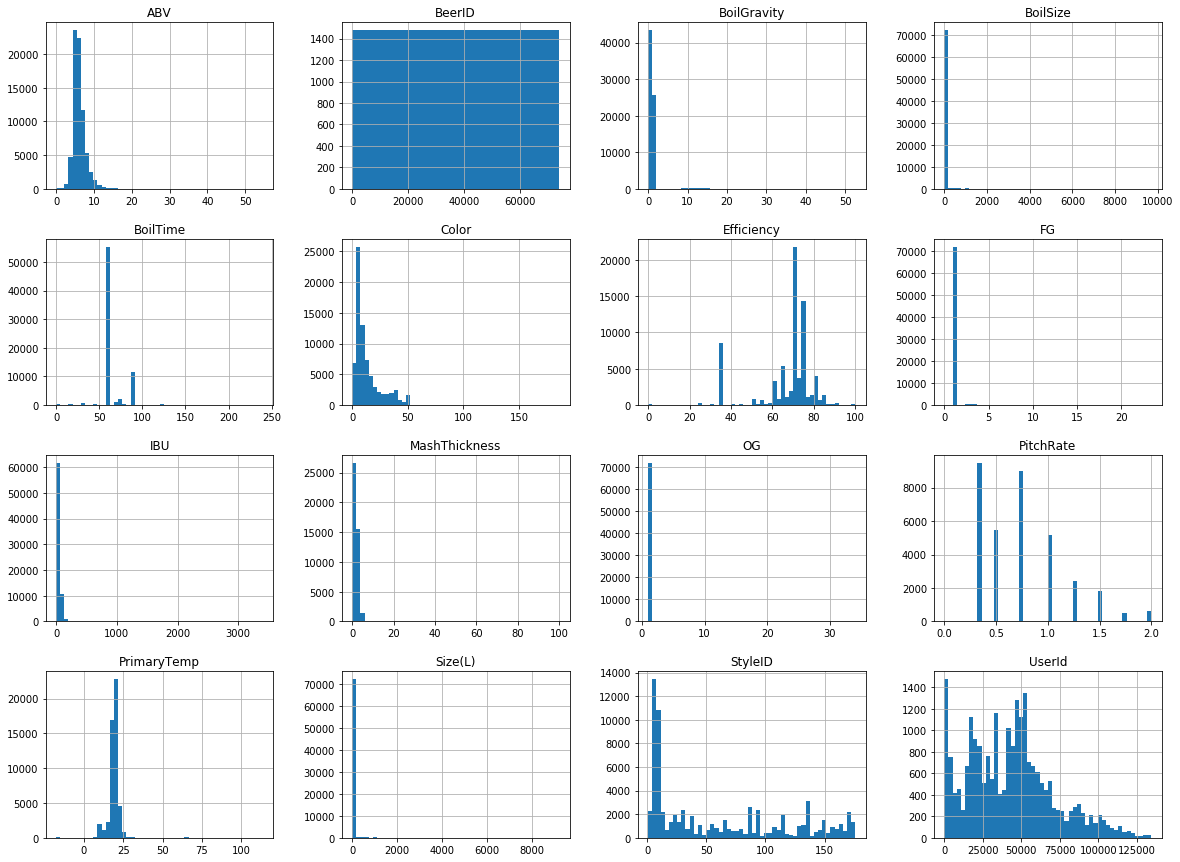

In [12]:
%matplotlib inline
brews.hist(bins=50, figsize=(20,15))

plt.show()


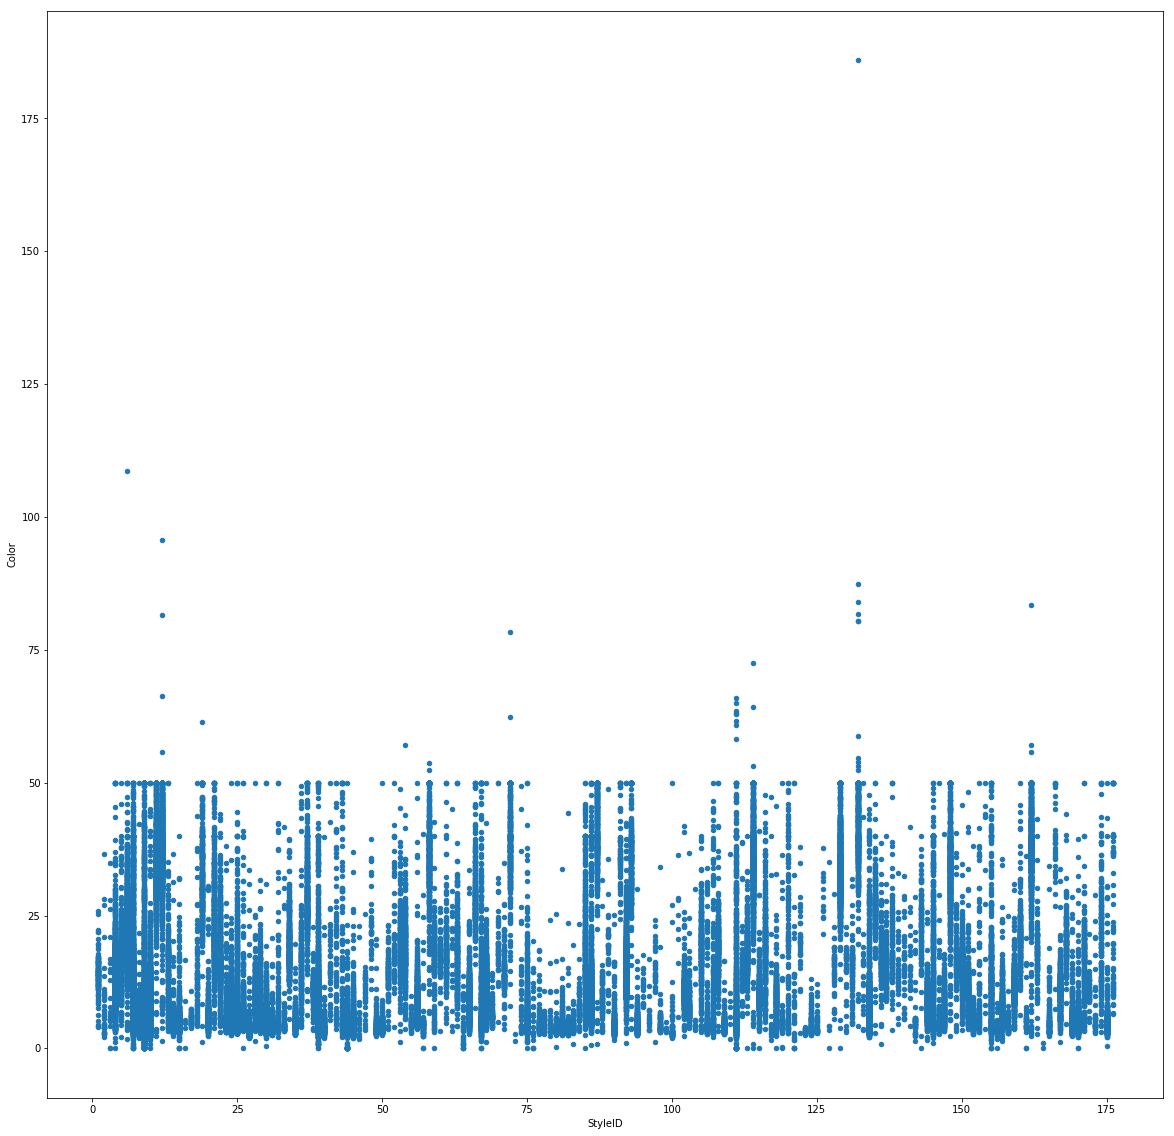

In [17]:
%matplotlib inline
brews.plot(x='StyleID', y='Color', kind='scatter', figsize=(20,20))

plt.show()


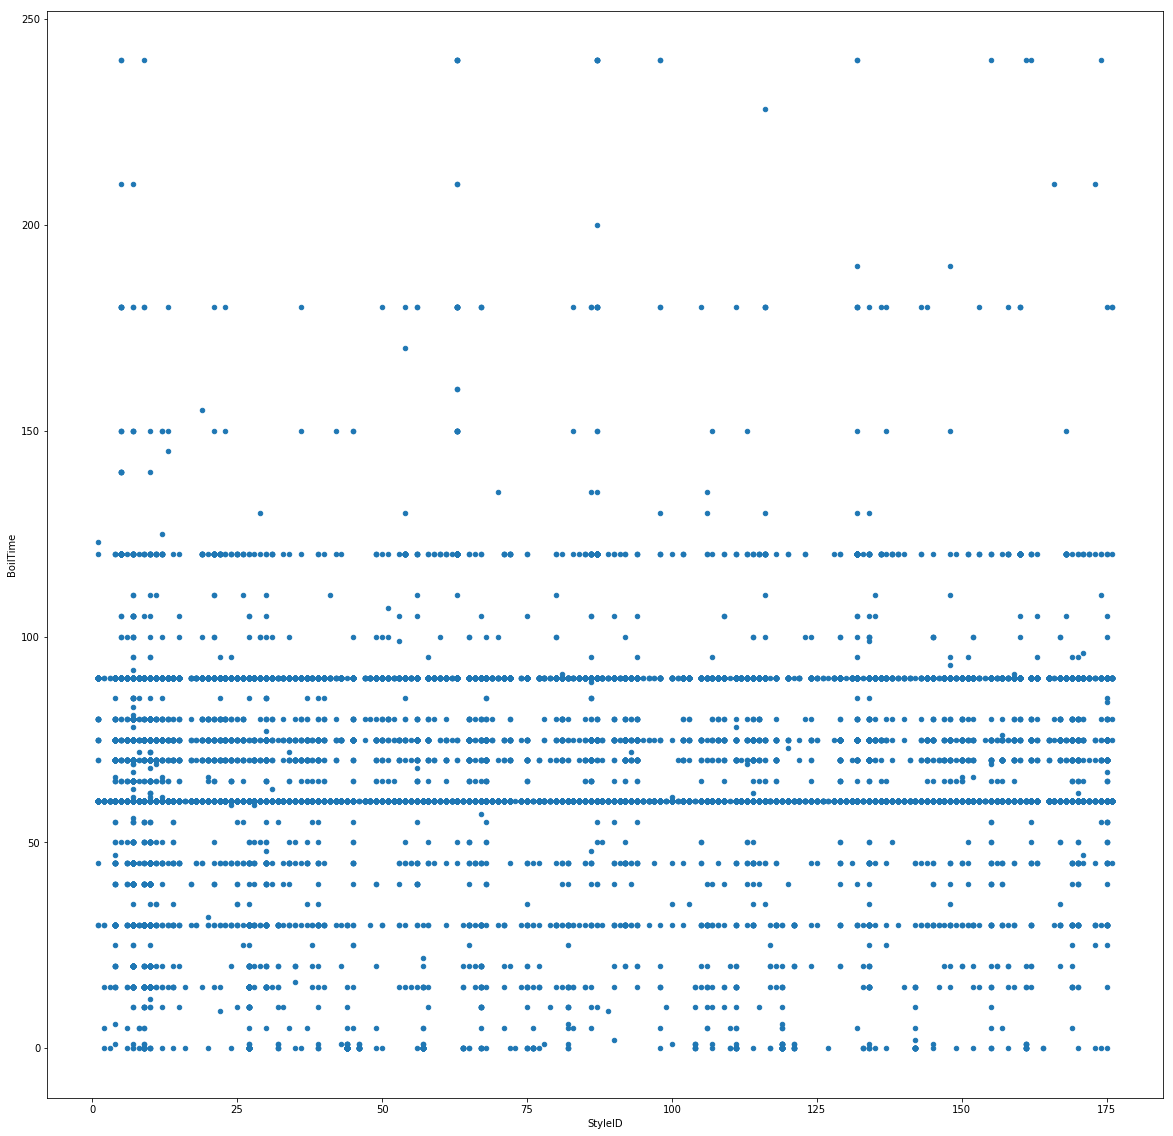

In [21]:
%matplotlib inline
brews.plot(x='StyleID', y='BoilTime', kind='scatter', figsize=(20,20))

plt.show()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

test_set = None
train_set = None

for train_index, test_index in sss.split(brews, brews['StyleID']):
    print (train_index, test_index, len(train_index),len(test_index))
    test_set = brews.loc[test_index]
    train_set = brews.loc[train_index] 

print(train_set['StyleID'].value_counts() /len(train_set))
print('----')
print(test_set['StyleID'].value_counts() /len(test_set))
    

[34217 48243 36559 ..., 41463 44030 39670] [33130 48997  2665 ..., 31554 58284 24920] 59088 14773
7      0.161657
10     0.102644
134    0.035422
9      0.030818
4      0.027586
30     0.023727
86     0.020004
12     0.017161
92     0.016298
6      0.015587
175    0.014504
39     0.014131
169    0.013370
114    0.013014
132    0.012574
162    0.012439
170    0.012439
129    0.012134
94     0.011762
56     0.011694
45     0.011237
11     0.010645
65     0.010611
87     0.009139
68     0.008919
14     0.008851
148    0.008631
24     0.008462
111    0.008073
15     0.007734
         ...   
48     0.000474
64     0.000440
78     0.000440
47     0.000440
130    0.000440
122    0.000423
166    0.000423
97     0.000406
125    0.000406
141    0.000338
76     0.000305
133    0.000305
62     0.000288
3      0.000288
79     0.000271
46     0.000237
95     0.000237
96     0.000237
117    0.000237
123    0.000203
104    0.000186
126    0.000169
154    0.000152
110    0.000102
101    0.000102
99    